<a href="https://colab.research.google.com/github/hassaan921/Excel_Dashboards/blob/main/Hassaan_Malik_EDA_Portfolio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import importlib
import subprocess
import sys

def install_and_load(libraries):
    """
    A single function that imports multiple libraries in one input.
    """
    for lib in libraries:
        try:
            # Check if the library is installed or not
            importlib.import_module(lib)
            print(f"'{lib}' is already installed.")
        except ImportError:
            # Install the library if not found
            print(f"'{lib}' not found. Installing...")
            subprocess.check_call([sys.executable, "-m", "pip", "install", lib])
        finally:
            # Import the library after installation and assign it to a global variable
            globals()[lib] = importlib.import_module(lib)
            globals()[lib] = globals()[lib]
            print(f"'{lib}' has been loaded.")

# Get input from user
user_input = input("Enter library names separated by commas: ")
libraries = [lib.strip() for lib in user_input.split(",")]

# Install and load libraries
install_and_load(libraries)

In [70]:
af_treadmill = pandas.read_csv("/content/drive/MyDrive/Colab Notebooks/data sets/EDA_aerofit__treadmill_data - aerofit__treadmill_data.csv")

In [71]:
af_treadmill.shape

(180, 9)

In [ ]:
af_treadmill

In [ ]:
af_treadmill.info()

# **Looking for Categorical and Numeric Data Description**

In [ ]:
af_treadmill.describe(include=["O"])

In [ ]:
af_treadmill.describe()

# **Missing Values**
Info() and describe() showed that no values are missing. This visualization confirms it too.

In [ ]:
missingno.bar(af_treadmill)

# **Duplicates**
Using duplicated() shows no duplicated data.

In [ ]:
for column in af_treadmill:
  print(f"Duplicates in", {column})
  print(af_treadmill.duplicated().sum())

# **Non-Graphical Analysis:**
Following functions gives value counts and unique attributes for all *categorical* features

In [ ]:
af_treadmill_non_numeric = af_treadmill.select_dtypes(exclude=[numpy.number])
non_numeric_cols = af_treadmill_non_numeric.columns.values
non_numeric_cols

In [ ]:
for column in af_treadmill_non_numeric:
  print(f"Value count for {column}")
  print(af_treadmill_non_numeric[column].value_counts())
  print("\n")
  print(f"Unique attributes in {column}")
  print(af_treadmill_non_numeric[column].unique())
  print("-----------------------------------------------")
  print("\n")
print("End")

**Graphical Analysis:**
 Univariate Analysis - Numerical features:
o Distribution Plot
o Count Plot
o Box Plot

In [ ]:
# defined this module separately to assign an alias, which could not be done in the first function for other modules
import matplotlib.pyplot as plt

In [ ]:
# defining a new variable containing all numeric features

af_treadmill_numeric = af_treadmill.select_dtypes(include=[numpy.number])
numeric_cols = af_treadmill_numeric.columns.values

numeric_cols

In [ ]:
# setting the number, orientation, and sizes of various subplots

fig, axes = plt.subplots(nrows=3,ncols=2,figsize=(15,10))
fig.suptitle('Distribution of Numerical Features\n', size = 18)

# plotting distribution/histogram plot for numeric features

axes[0,0].hist(af_treadmill['Age'],bins=10, linewidth=0.5, edgecolor="white")
axes[0,0].set(xlabel='', ylabel='Frequency')
axes[0,0].set_title("Distribution of Age(In Years)");

axes[0,1].hist(af_treadmill['Education'],bins=10, linewidth=0.5, edgecolor="white")
axes[0,1].set(xlabel='', ylabel='Frequency')
axes[0,1].set_title("Distribution of Education(In Years)");

axes[1,0].hist(af_treadmill['Usage'],bins=5, linewidth=0.5, edgecolor="white")
axes[1,0].set(xlabel='', ylabel='Frequency')
axes[1,0].set_title("Distribution of Usage(Planned)");

axes[1,1].hist(af_treadmill['Fitness'],bins=5, linewidth=0.5, edgecolor="white")
axes[1,1].set(xlabel='', ylabel='Frequency')
axes[1,1].set_title("Distribution of Fitness(Self-Reported)");

axes[2,0].hist(af_treadmill['Income'],bins=100, linewidth=0.5, edgecolor="white")
axes[2,0].set(xlabel='', ylabel='Frequency')
axes[2,0].set_title("Distribution of Income(In USD)");

axes[2,1].hist(af_treadmill['Miles'],bins=10, linewidth=0.5, edgecolor="white")
axes[2,1].set(xlabel='', ylabel='Frequency')
axes[2,1].set_title("Distribution of Miles");

plt.tight_layout()

### **Count plots** did not seem an optimal choice for visualizing numerical data, so instead, using density plots to visualize density of data as well as looking for patterns not easily discernible in distribution plots above.

In [ ]:
fig, axes = plt.subplots(nrows=3,ncols=2,figsize=(15,10))
fig.suptitle('Density of Numerical Features\n', size = 18)

seaborn.kdeplot(af_treadmill_numeric['Age'], ax=axes[0,0])
axes[0,0].set_title("Density of Age(In Years)");

seaborn.kdeplot(af_treadmill_numeric['Education'], ax=axes[0,1])
axes[0,1].set_title("Density of Education(In Years)");

seaborn.kdeplot(af_treadmill_numeric['Usage'], ax=axes[1,0])
axes[1,0].set_title("Density of of Usage(Planned)");

seaborn.kdeplot(af_treadmill_numeric['Fitness'], ax=axes[1,1])
axes[1,1].set_title("Density of Fitness(Self-Reported)");

seaborn.kdeplot(af_treadmill_numeric['Income'], ax=axes[2,0])
axes[2,0].set_title("Density of Income(In USD)");

seaborn.kdeplot(af_treadmill_numeric['Miles'], ax=axes[2,1])
axes[2,1].set_title("Density of Miles");

plt.tight_layout()

Boxplots

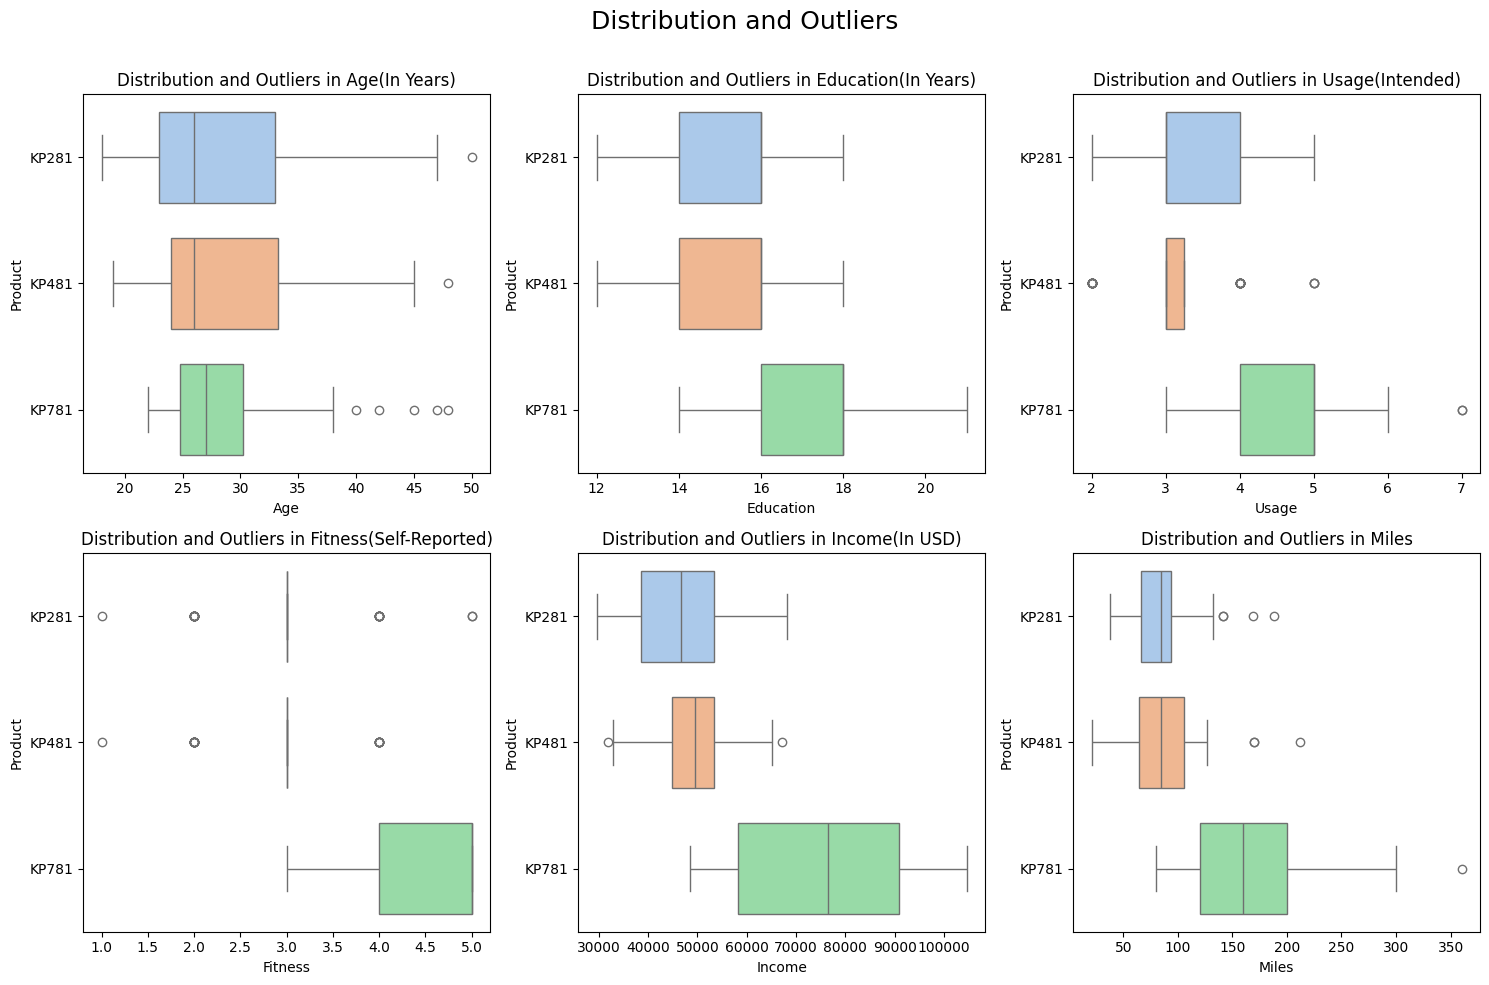

In [84]:
fig, axes = plt.subplots(nrows=2, ncols=3,figsize=(15,10))
fig.suptitle('Distribution and Outliers\n', size = 18)

seaborn.boxplot(ax=axes[0,0], data=af_treadmill, x='Age', y='Product', hue='Product', palette='pastel', gap=.1)
axes[0,0].set_title("Distribution and Outliers in Age(In Years)");

seaborn.boxplot(ax=axes[0, 1], data=af_treadmill, x='Education', y='Product', hue='Product', palette='pastel', gap=.1)
axes[0,1].set_title("Distribution and Outliers in Education(In Years)");

seaborn.boxplot(ax=axes[0, 2], data=af_treadmill, x='Usage', y='Product',hue='Product', palette='pastel', gap=.1)
axes[0,2].set_title("Distribution and Outliers in Usage(Intended)");

seaborn.boxplot(ax=axes[1, 0], data=af_treadmill, x='Fitness', y='Product',hue='Product', palette='pastel', gap=.1)
axes[1,0].set_title("Distribution and Outliers in Fitness(Self-Reported)");

seaborn.boxplot(ax=axes[1, 1], data=af_treadmill, x='Income', y='Product',hue='Product', palette='pastel', gap=.1)
axes[1,1].set_title("Distribution and Outliers in Income(In USD)");

seaborn.boxplot(ax=axes[1,2], data=af_treadmill, x='Miles', y='Product',hue='Product', palette='pastel', gap=.1)
axes[1,2].set_title("Distribution and Outliers in Miles");

plt.tight_layout()

 **Univariate Analysis - Categorical features:**

o Count Plot


In [ ]:
# setting the number, orientation, and sizes of various subplots
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15,6))
fig.suptitle('Count of Categorical Features\n', size=18)


# plotting count plot for Gender
cp1 = seaborn.countplot(ax=axes[0], data=af_treadmill_non_numeric, x='Gender', width = 0.3)


# removed labels to prevent redundancy in plot and subplots' titles
cp1.set(xlabel='', ylabel='')
axes[0].set_title("Count of Gender");


# displaying value labels on top of bars
abs_values1 = af_treadmill_non_numeric['Gender'].value_counts(ascending=False).values
cp1.bar_label(container=cp1.containers[0], labels=abs_values1)


# plotting count plot for Product
cp2 = seaborn.countplot(ax=axes[1], data=af_treadmill_non_numeric, x='Product', width = 0.4)


# removed labels for cp2
cp2.set(xlabel='', ylabel='')
axes[1].set_title("Count of Product");


# displaying value labels on top of bars
abs_values2 = af_treadmill_non_numeric['Product'].value_counts(ascending=False).values
cp2.bar_label(container=cp2.containers[0], labels=abs_values2)


# plotting count plot for MaritalStatus
cp3 = seaborn.countplot(ax=axes[2], data=af_treadmill_non_numeric, x='MaritalStatus', width = 0.3)


# removed labels for cp3
cp3.set(xlabel='', ylabel='')
axes[2].set_title("Count of Marital Status");


# Due to orientation of both bars, set the order of value labels ascending to prevent wrong labels
abs_values3 = af_treadmill_non_numeric['MaritalStatus'].value_counts(ascending=True).values

cp3.bar_label(container=cp3.containers[0], labels=abs_values3)

plt.tight_layout()

### **Chi-Square Test of Significance**

Doing a chi-square test for significance level 5%, it was found that:
- Gender and products has significant association (p-value: 0.001), whereas no significant association was found between products vs. age (p-value: 0.960) and marital status (p-value: 0.900)

#### _**Source(s) used to perform this step**:_
1. Technical Guide to Chi-Square Test: https://www.stratascratch.com/blog/chi-square-test-in-python-a-technical-guide/
2. Scipy module documentation: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chi2_contingency.html

In [ ]:
# Age is numeric, so binning into a categorical feature using cut()

binnames = ['Young Adult','Middle-Aged Adult','Late-Age Adult']

af_treadmill['AgeLabeled'] = pandas.cut(af_treadmill['Age'],
                     bins=[15,25,45,55],
                     labels=binnames)
af_treadmill

In [ ]:
!pip install scipy

In [ ]:
from scipy.stats import chi2_contingency

# Defined the categorical features and the target variable
categorical_features = ['Gender', 'MaritalStatus', 'AgeLabeled']
target_variable = 'Product'

# defining a function to run the chi-square test
def chi_square_test(feature, target):
    contingency_table = pandas.crosstab(af_treadmill[feature], af_treadmill[target])
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    return chi2, p

# Load your dataset into a DataFrame called 'data'
# data = pd.read_csv('your_data.csv')  # Uncomment and modify as needed

# Perform chi-square tests for each categorical feature
for feature in categorical_features:
    chi2, p = chi_square_test(feature, target_variable)  # p is correctly returned and used here
    print(f"Chi-Square Test for {feature} vs {target_variable}:")
    print("-------------------------")
    print(f"Chi-Square Statistic: {chi2}")
    print("-------------------------")
    print(f"p-value: {p}")
    print("-------------------------")

# p-value set for 95% confidence interval and 5% significance level
    if p < 0.05:
        print("Significant association found.")
    else:
        print("No significant association found.")
    print("\n")

**Multivariate Analysis:**
o Create pairplots to show relationship of features

**Interpretation:**

Seaborn Pairplot: A Guide: https://builtin.com/articles/seaborn-pairplot

In [ ]:
numeric_col_pairs = seaborn.pairplot(af_treadmill_numeric,
                                     kind = "reg", # added regression line to visualize the relationship in numeric pairs
                                     plot_kws={'line_kws':{'color':'red'}}, # introduced color for easier reading
                                     diag_kind='kde', # replacing the default histograms with density plots on the diagonal
                                     diag_kws={'color':'red'}) # tweaked the color

# **Correlation Analysis**

In [ ]:
fig, ax = plt.subplots(figsize=(10, 10))

corr = af_treadmill.select_dtypes(include = numpy.number).corr()# plot the heatmap
corheat=seaborn.heatmap(corr,
                        xticklabels=corr.columns,
                        yticklabels=corr.columns,
                        annot=True,
                        cmap=seaborn.diverging_palette(220, 20, as_cmap=True))

corheat.set_title('Correlation among Numeric Features\n', size = 18)

## **Tukey's IQR Method**

In [ ]:
feature_list = ['Age', 'Education', 'Usage','Fitness', 'Income', 'Miles']

In [ ]:
from collections import Counter

In [ ]:
def IQR_method (df,n,features):
    """
    Takes a dataframe and returns an index list corresponding to the observations
    containing more than n outliers according to the Tukey IQR method.
    """
    outlier_list = []

    for column in features:

        # 1st quartile (25%)
        Q1 = numpy.percentile(df[column], 25)
        # 3rd quartile (75%)
        Q3 = numpy.percentile(df[column],75)

        # Interquartile range (IQR)
        IQR = Q3 - Q1

        # outlier step
        outlier_step = 1.5 * IQR

        # Determining a list of indices of outliers
        outlier_list_column = df[(df[column] < Q1 - outlier_step) | (df[column] > Q3 + outlier_step )].index

        # appending the list of outliers
        outlier_list.extend(outlier_list_column)

    # selecting observations containing more than x outliers
    outlier_list = Counter(outlier_list)
    multiple_outliers = list( k for k, v in outlier_list.items() if v > n )

    # Calculate the number of records below and above lower and above bound value respectively
    low_outliers = df[df[column] < Q1 - outlier_step]
    high_outliers = df[df[column] > Q3 + outlier_step]

    print('Total number of outliers is:', low_outliers.shape[0]+high_outliers.shape[0])

    return multiple_outliers

In [79]:
af_outliers = IQR_method(af_treadmill,1,feature_list)
af_outliers

Total number of outliers is: 13


[178, 179, 161, 175, 155, 162, 164, 166, 167, 170, 171, 173, 176]

In [81]:
# dropping outliers
af_outliers_removed = af_treadmill.drop(af_outliers, axis = 0).reset_index(drop=True)
#The reset_index() method allows you reset the index back to the default 0, 1, 2 etc indexes.

In [82]:
af_outliers_removed.shape

(167, 9)

### **Replotting boxplots to see changes.**
It is clear that some outliers have persisted.

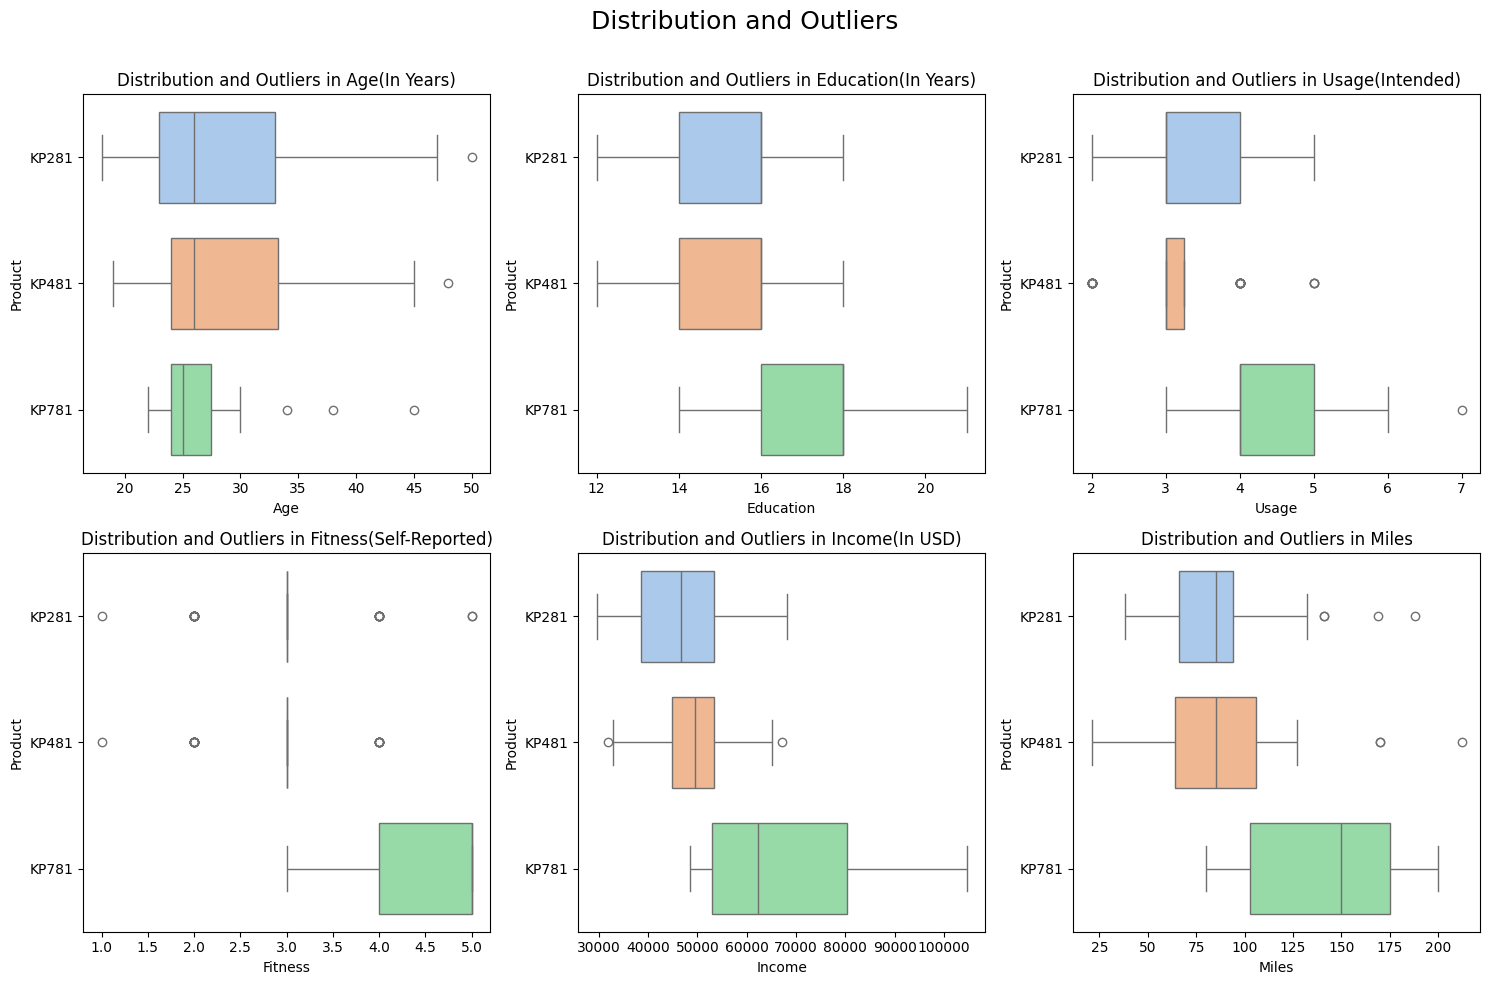

In [83]:
fig, axes = plt.subplots(nrows=2, ncols=3,figsize=(15,10))
fig.suptitle('Distribution and Outliers\n', size = 18)

seaborn.boxplot(ax=axes[0,0], data=af_outliers_removed, x='Age', y='Product', hue='Product', palette='pastel', gap=.1)
axes[0,0].set_title("Distribution and Outliers in Age(In Years)");

seaborn.boxplot(ax=axes[0, 1], data=af_outliers_removed, x='Education', y='Product', hue='Product', palette='pastel', gap=.1)
axes[0,1].set_title("Distribution and Outliers in Education(In Years)");

seaborn.boxplot(ax=axes[0, 2], data=af_outliers_removed, x='Usage', y='Product',hue='Product', palette='pastel', gap=.1)
axes[0,2].set_title("Distribution and Outliers in Usage(Intended)");

seaborn.boxplot(ax=axes[1, 0], data=af_outliers_removed, x='Fitness', y='Product',hue='Product', palette='pastel', gap=.1)
axes[1,0].set_title("Distribution and Outliers in Fitness(Self-Reported)");

seaborn.boxplot(ax=axes[1, 1], data=af_outliers_removed, x='Income', y='Product',hue='Product', palette='pastel', gap=.1)
axes[1,1].set_title("Distribution and Outliers in Income(In USD)");

seaborn.boxplot(ax=axes[1,2], data=af_outliers_removed, x='Miles', y='Product',hue='Product', palette='pastel', gap=.1)
axes[1,2].set_title("Distribution and Outliers in Miles");

plt.tight_layout()

#### **9 out of 13 outliers persist even after Tukey's IQR method for outliers removal**

At this point, it is beyond me if I should run the Tukey's IQR method again. It is possible that z-score or standard deviation methods may be more robust. I shall try them after finishing this project.

In [90]:
post_tukeyIQR_outliers = IQR_method(af_outliers_removed,1,feature_list)
post_tukeyIQR_outliers

Total number of outliers is: 9


[155, 154, 160, 23, 142, 148, 152, 158, 161, 163, 164, 165, 166]

In [100]:
outlier_indices = af_treadmill.loc[[155, 154, 160, 23, 142, 148, 152, 158, 161, 163, 164, 165, 166]]
outlier_indices[['Age','Education','Usage','Fitness','Income','Miles']].sort_values(by=['Age'])

,Age,Education,Usage,Fitness,Income,Miles
142,22,18,4,5,48556,200
23,24,16,5,5,44343,188
148,24,16,5,5,52291,200
155,25,18,6,5,75946,240
154,25,18,6,4,70966,180
152,25,18,5,5,61006,200
158,26,16,5,4,64741,180
160,27,18,4,3,88396,100
161,27,21,4,4,90886,100
163,28,18,7,5,77191,180


###7. Conditional Probabilities:
- What percent of customers have purchased KP281, KP481, or KP781?




Create frequency tables and calculate the percentage as follows

**Product – Gender**
1. Percentage of a Male customer purchasing a treadmill
2. Percentage of a Female customer purchasing KP781 treadmill
3. Probability of a customer being a Female given that Product is
KP281
**Product – Age**
1. Percentage of customers with Age between 20s and 30s among all
customers
**Product – Income**
1. Percentage of a low-income customer purchasing a treadmill
2. Percentage of a high-income customer purchasing KP781
treadmill
3. Percentage of customer with high-income salary buying treadmill
given that Product is KP781
**Product – Fitness**
1. Percentage of customers that have fitness level 5
2. Percentage of a customer with Fitness Level 5 purchasing KP781
treadmill
3. Percentage of customer with fitness level 5 buying KP781
treadmill
**Product –  Marital Status**
1. Percentage of a customers who are partnered using treadmills